# Basic Data Analysis & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
world = pd.read_csv("countries_of_the_world.csv")

In [3]:
type(world)

pandas.core.frame.DataFrame

In [7]:
world.shape

(227, 20)

In [6]:
world.columns

Index(['country', 'region', 'population', 'area_sq_mi',
       'pop_density_per_sq_mi', 'coastline_coastarea_ratio', 'net_migration',
       'infant_mortality_per_1000_births', 'gdp_$_per_capita', 'literacy',
       'phones_per_1000', 'arable', 'crops', 'other', 'climate', 'birthrate',
       'deathrate', 'agriculture', 'industry', 'service'],
      dtype='object')

In [10]:
world.head()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_$_per_capita,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [11]:
world.tail()

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_$_per_capita,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"


In [12]:
world['climate'].unique()

array(['1', '3', '2', nan, '4', '1,5', '2,5'], dtype=object)

In [13]:
world['climate'].nunique()

6

In [14]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           227 non-null    object 
 1   region                            227 non-null    object 
 2   population                        227 non-null    int64  
 3   area_sq_mi                        227 non-null    int64  
 4   pop_density_per_sq_mi             227 non-null    object 
 5   coastline_coastarea_ratio         227 non-null    object 
 6   net_migration                     224 non-null    object 
 7   infant_mortality_per_1000_births  224 non-null    object 
 8   gdp_$_per_capita                  226 non-null    float64
 9   literacy                          209 non-null    object 
 10  phones_per_1000                   223 non-null    object 
 11  arable                            225 non-null    object 
 12  crops   

In [15]:
#Summary Statistics
world.describe()

,population,area_sq_mi,gdp_$_per_capita
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## Data Cleaning

In [18]:
#extract all the column names whose values have ',' in them
str_columns = ['pop_density_per_sq_mi', 'coastline_coastarea_ratio', 'net_migration',
       'infant_mortality_per_1000_births', 'literacy',
       'phones_per_1000', 'arable', 'crops', 'other', 'climate', 'birthrate',
       'deathrate', 'agriculture', 'industry', 'service']

In [ ]:
for column in str_columns:
    world[column] = world[column].str.replace(',', '.')
    world[column] = pd.to_numeric(world[column])

In [31]:
world.head(1)

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_$_per_capita,literacy,phones_per_1000,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.6,20.34,0.38,0.24,0.38


In [32]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           227 non-null    object 
 1   region                            227 non-null    object 
 2   population                        227 non-null    int64  
 3   area_sq_mi                        227 non-null    int64  
 4   pop_density_per_sq_mi             227 non-null    float64
 5   coastline_coastarea_ratio         227 non-null    float64
 6   net_migration                     224 non-null    float64
 7   infant_mortality_per_1000_births  224 non-null    float64
 8   gdp_$_per_capita                  226 non-null    float64
 9   literacy                          209 non-null    float64
 10  phones_per_1000                   223 non-null    float64
 11  arable                            225 non-null    float64
 12  crops   

In [34]:
world.isnull().sum()

country                              0
region                               0
population                           0
area_sq_mi                           0
pop_density_per_sq_mi                0
coastline_coastarea_ratio            0
net_migration                        3
infant_mortality_per_1000_births     3
gdp_$_per_capita                     1
literacy                            18
phones_per_1000                      4
arable                               2
crops                                2
other                                2
climate                             22
birthrate                            3
deathrate                            4
agriculture                         15
industry                            16
service                             15
dtype: int64

In [38]:
#extract the column names in which missing values need to be replaced
fill = ['net_migration',
       'infant_mortality_per_1000_births', 'gdp_$_per_capita', 'literacy',
     'phones_per_1000', 'arable', 'crops', 'other', 'climate',
       'birthrate', 'deathrate', 'agriculture', 'industry', 'service']
len(fill)

14

In [39]:
for col in fill:
    world[col]=world[col].fillna(world[col].median())
world.isnull().sum()

country                             0
region                              0
population                          0
area_sq_mi                          0
pop_density_per_sq_mi               0
coastline_coastarea_ratio           0
net_migration                       0
infant_mortality_per_1000_births    0
gdp_$_per_capita                    0
literacy                            0
phones_per_1000                     0
arable                              0
crops                               0
other                               0
climate                             0
birthrate                           0
deathrate                           0
agriculture                         0
industry                            0
service                             0
dtype: int64

In [40]:
world.duplicated().sum()

0

In [41]:
world.drop('other',axis=1,inplace=True)
world.head(1)

,country,region,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_$_per_capita,literacy,phones_per_1000,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,36.0,3.2,12.13,0.22,1.0,46.6,20.34,0.38,0.24,0.38


## Data Visualization

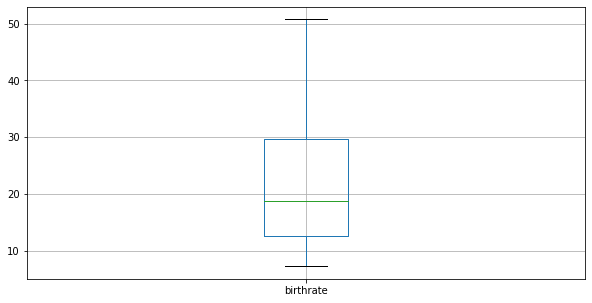

In [45]:
world.boxplot(column='birthrate',figsize=(10,5));

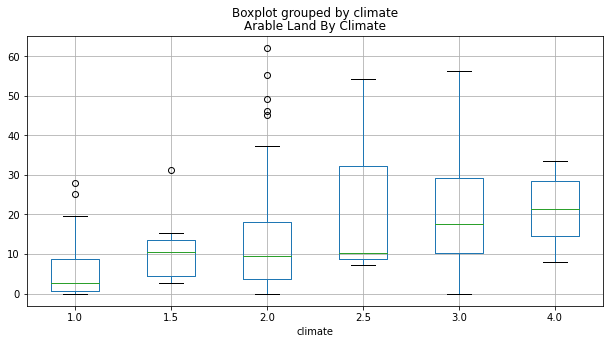

In [48]:
world.boxplot(column='arable',by='climate',figsize=(10,5))
plt.title("Arable Land By Climate");

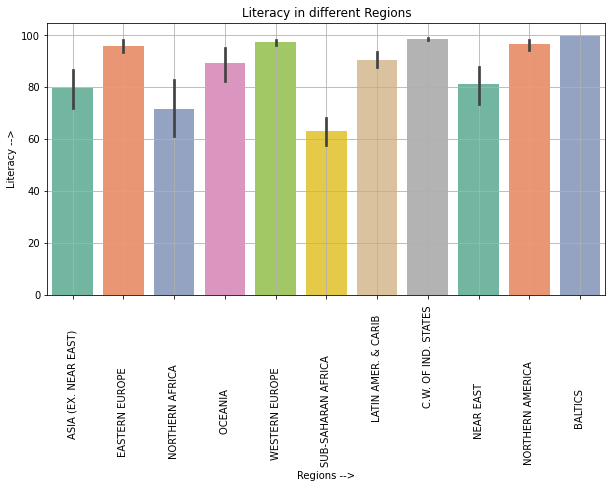

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='region',y='literacy',data=world, palette='Set2');
plt.xticks(rotation=90)
plt.grid()
plt.title('Literacy in different Regions')
plt.xlabel('Regions -->')
plt.ylabel('Literacy -->')
plt.show()

In [51]:
world.corr()

,population,area_sq_mi,pop_density_per_sq_mi,coastline_coastarea_ratio,net_migration,infant_mortality_per_1000_births,gdp_$_per_capita,literacy,phones_per_1000,arable,crops,climate,birthrate,deathrate,agriculture,industry,service
population,1.000000,0.469985,-0.028190,-0.068199,0.000036,0.024298,-0.038864,-0.052456,-0.029663,0.188704,-0.059782,-0.024411,-0.044189,-0.027215,0.006249,0.100471,-0.081254
area_sq_mi,0.469985,1.000000,-0.066917,-0.095627,0.047472,-0.005594,0.072491,0.025232,0.054703,-0.078881,-0.142477,-0.091789,-0.065285,0.041447,-0.044291,0.122299,-0.054677
pop_density_per_sq_mi,-0.028190,-0.066917,1.000000,0.241690,0.178011,-0.142953,0.196093,0.101518,0.280802,-0.081404,-0.032330,-0.001699,-0.158282,-0.069021,-0.106589,-0.109147,0.189446
coastline_coastarea_ratio,-0.068199,-0.095627,0.241690,1.000000,-0.134051,-0.137171,0.049614,0.127766,0.152497,-0.121735,0.339312,-0.033284,-0.075378,-0.161813,-0.043559,-0.189342,0.183868
net_migration,0.000036,0.047472,0.178011,-0.134051,1.000000,-0.024945,0.381877,-0.005668,0.239220,-0.060119,-0.344059,-0.020845,-0.066087,0.033964,-0.108935,-0.025006,0.114301
infant_mortality_per_1000_births,0.024298,-0.005594,-0.142953,-0.137171,-0.024945,1.000000,-0.596424,-0.756088,-0.666106,-0.110154,-0.066185,-0.333355,0.845636,0.656874,0.707926,0.009511,-0.619634
gdp_$_per_capita,-0.038864,0.072491,0.196093,0.049614,0.381877,-0.596424,1.000000,0.495909,0.830903,0.021194,-0.217685,0.295621,-0.645865,-0.198155,-0.572473,-0.029482,0.532418
literacy,-0.052456,0.025232,0.101518,0.127766,-0.005668,-0.756088,0.495909,1.000000,0.565414,0.085631,0.044724,0.359711,-0.754837,-0.394168,-0.597133,0.040135,0.481603
phones_per_1000,-0.029663,0.054703,0.280802,0.152497,0.239220,-0.666106,0.830903,0.565414,1.000000,0.059448,-0.150963,0.345543,-0.719766,-0.257397,-0.581195,-0.143477,0.626184
arable,0.188704,-0.078881,-0.081404,-0.121735,-0.060119,-0.110154,0.021194,0.085631,0.059448,1.000000,0.095226,0.346590,-0.183561,0.053051,-0.021570,-0.057425,0.085316


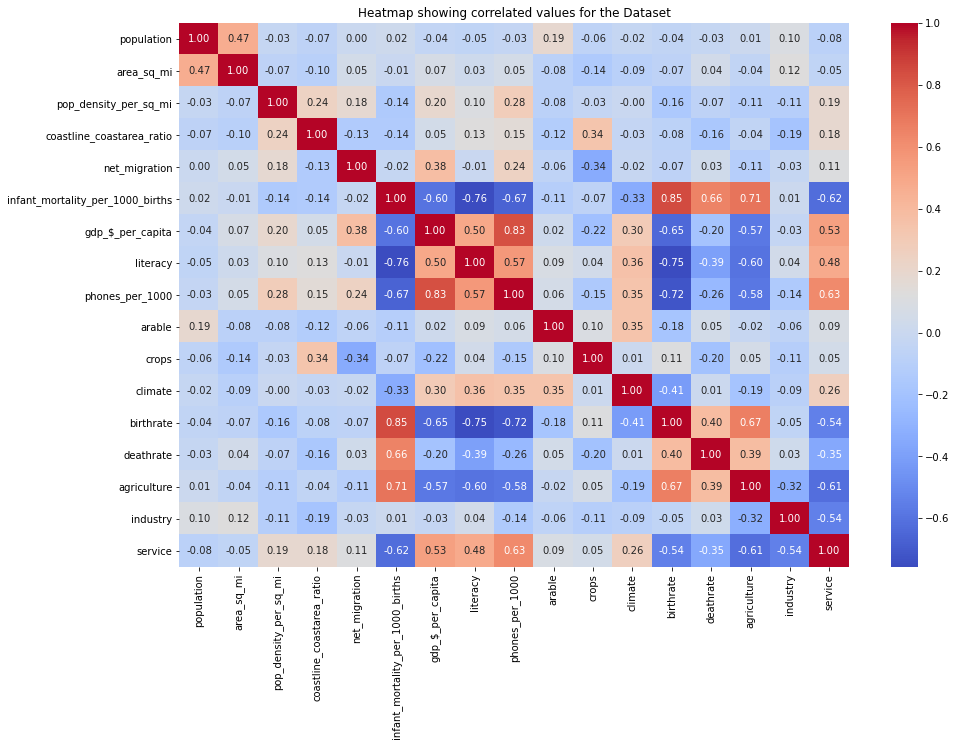

In [52]:
#Visual representation in form of heatmap for correlated data
plt.figure(figsize=(15,10))
ax=plt.axes()
sns.heatmap(data=world.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm',ax=ax)
ax.set_title('Heatmap showing correlated values for the Dataset')
plt.show()

In [53]:
#Grouping Data by region
grp = world.groupby('region')
x = grp['population'].agg(np.mean)
y = grp['gdp_$_per_capita'].agg(np.mean)
print(x)
print('------------------------------------------')
print(y)

region
ASIA (EX. NEAR EAST)                   1.317137e+08
BALTICS                                2.394991e+06
C.W. OF IND. STATES                    2.334013e+07
EASTERN EUROPE                         9.992893e+06
LATIN AMER. & CARIB                    1.248499e+07
NEAR EAST                              1.219177e+07
NORTHERN AFRICA                        2.690119e+07
NORTHERN AMERICA                       6.633446e+07
OCEANIA                                1.577698e+06
SUB-SAHARAN AFRICA                     1.469484e+07
WESTERN EUROPE                         1.415500e+07
Name: population, dtype: float64
------------------------------------------
region
ASIA (EX. NEAR EAST)                    8053.571429
BALTICS                                11300.000000
C.W. OF IND. STATES                     4000.000000
EASTERN EUROPE                          9808.333333
LATIN AMER. & CARIB                     8682.222222
NEAR EAST                              10456.250000
NORTHERN AFRICA           

# END